In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import optimize
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings('ignore')
sns.set()

C:\Users\kisha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
hourlydf = pd.read_csv(r'C:\Users\kisha\Documents\Springboard Data Science\Capstone Project 1\Datasets Italia\Telecommunications - SMS, Call, Internet - MI\Hourly-Consolidated-cellid_day.txt',delimiter='\t')
hourlydf.iloc[::100000]

,cellId,timeIntervalts,timeInterval,SMSin,SMSout,callIn,callOut,internet,SMS,call
0,1,2013-11-01 00:00:00+01:00,8299571400000,2.084285,1.104749,0.591930,0.429290,57.799009,3.189034,1.021221
100000,71,2013-12-07 16:00:00+01:00,8318579400000,5.439302,4.080989,3.566774,4.921197,91.608034,9.520291,8.487971
200000,142,2013-11-16 14:00:00+01:00,8307649800000,5.043325,15.496752,4.778215,4.045091,66.746060,20.540077,8.823306
300000,212,2013-12-24 11:00:00+01:00,8327284200000,5.949796,2.324965,4.349472,4.894890,23.199024,8.274761,9.244362
400000,283,2013-12-02 03:00:00+01:00,8315706600000,0.091614,0.022904,0.000000,0.000000,5.001055,0.114518,0.000000
...,...,...,...,...,...,...,...,...,...,...
13700000,9677,2013-12-16 10:00:00+01:00,8323115400000,51.853791,18.978159,54.413618,65.294730,795.214537,70.831950,119.708347
13800000,9748,2013-11-24 02:00:00+01:00,8311537800000,1.590960,0.504737,0.105154,0.450351,295.781672,2.095697,0.555504
13900000,9819,2013-11-01 18:00:00+01:00,8299960200000,16.091510,7.017818,7.930460,11.230761,176.906108,23.109328,19.161220
14000000,9889,2013-12-08 10:00:00+01:00,8318968200000,10.059605,4.418877,14.930013,13.730482,391.924098,14.478482,28.660495


In [3]:
hourlydf['timeIntervalts'] = pd.to_datetime(hourlydf['timeIntervalts'])
hourlydf['hour'] = hourlydf['timeIntervalts'].dt.hour
hourlydf['day'] = hourlydf['timeIntervalts'].dt.day_name()
hourlydf['daynum'] = hourlydf.timeIntervalts.dt.dayofweek
hourlydf = hourlydf.set_index('timeIntervalts')
hourlydf.iloc[::100000]

,cellId,timeInterval,SMSin,SMSout,callIn,callOut,internet,SMS,call,hour,day,daynum
timeIntervalts,,,,,,,,,,,,
2013-11-01 00:00:00+01:00,1,8299571400000,2.084285,1.104749,0.591930,0.429290,57.799009,3.189034,1.021221,0,Friday,4
2013-12-07 16:00:00+01:00,71,8318579400000,5.439302,4.080989,3.566774,4.921197,91.608034,9.520291,8.487971,16,Saturday,5
2013-11-16 14:00:00+01:00,142,8307649800000,5.043325,15.496752,4.778215,4.045091,66.746060,20.540077,8.823306,14,Saturday,5
2013-12-24 11:00:00+01:00,212,8327284200000,5.949796,2.324965,4.349472,4.894890,23.199024,8.274761,9.244362,11,Tuesday,1
2013-12-02 03:00:00+01:00,283,8315706600000,0.091614,0.022904,0.000000,0.000000,5.001055,0.114518,0.000000,3,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-16 10:00:00+01:00,9677,8323115400000,51.853791,18.978159,54.413618,65.294730,795.214537,70.831950,119.708347,10,Monday,0
2013-11-24 02:00:00+01:00,9748,8311537800000,1.590960,0.504737,0.105154,0.450351,295.781672,2.095697,0.555504,2,Sunday,6
2013-11-01 18:00:00+01:00,9819,8299960200000,16.091510,7.017818,7.930460,11.230761,176.906108,23.109328,19.161220,18,Friday,4


In [4]:
# first 3 weeks train -->23-11-2013
# 4th week test --> 30-11-2013
# 5,6th week hold out 14-12-2013

train_data = hourlydf[hourlydf.index< '23-11-2013']
test_data = hourlydf[(hourlydf.index> '23-11-2013') & (hourlydf.index< '30-11-2013')]
hold_data = hourlydf[(hourlydf.index> '30-11-2013') & (hourlydf.index< '14-12-2013')]

In [22]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  SMSin   No. Observations:                  144
Model:                    ARMA(24, 0)   Log Likelihood                -835.355
Method:                       css-mle   S.D. of innovations           1555.894
Date:                Tue, 18 Aug 2020   AIC                           1720.709
Time:                        09:51:32   BIC                           1794.955
Sample:                    11-01-2013   HQIC                          1750.878
                         - 11-06-2013                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.SMSin      0.8709   5.25e-06   1.66e+05      0.000       0.871       0.871
ar.L2.SMSin      0.2222        nan        nan        nan         nan         nan
ar.L3.SMSin     -0.4176        nan        na

NameError: name 'DataFrame' is not defined

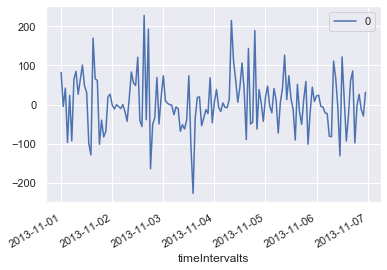

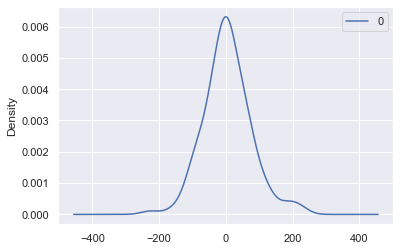

                0
count  144.000000
mean     5.277124
std     71.273747
min   -227.905967
25%    -39.061870
50%     -0.461705
75%     44.747425
max    228.409703


In [23]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [28]:
model.score('11-07-2013')

TypeError: ufunc 'absolute' did not contain a loop with signature matching types dtype('<U10') dtype('<U10')

In [6]:
from statsmodels.tsa.arima_model import ARIMA
 
model = ARIMA(train_data[(train_data.cellId ==5060) & (train_data.index < '11-07-2013')]['SMSin'], order=(24,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

KeyboardInterrupt: 

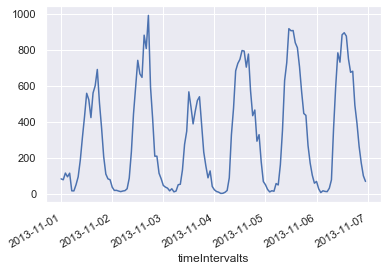

In [13]:
train_data[(train_data.cellId ==5060) & (train_data.index < '11-07-2013')]['SMSin']